# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
## Part II: Portfolio Optimization with Risk Factors using Stepwise Regression

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']
assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  29 of 29 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6779%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5379%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1377%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.

In [3]:
import riskfolio.ParamsEstimation as pe

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = pe.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6566,0.0000,0.9380,-0.7882,1.7278
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4788,-0.5992,0.0000,2.0807,0.0000
DE,0.0004,0.0000,0.0000,0.3633,0.0000,0.8093
DHR,0.0007,0.4817,0.0000,0.0000,0.8180,-0.2158
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3354,0.0000,0.5854


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,10.7366%,0.0000%,0.0000%,8.8164%,0.0000%,4.4016%,11.9283%,0.0000%,0.0000%,...,14.9636%,0.0000%,8.9182%,0.0000%,0.0000%,0.0000%,5.4728%,0.0000%,3.3483%,0.0000%


### 2.3 Plotting portfolio composition

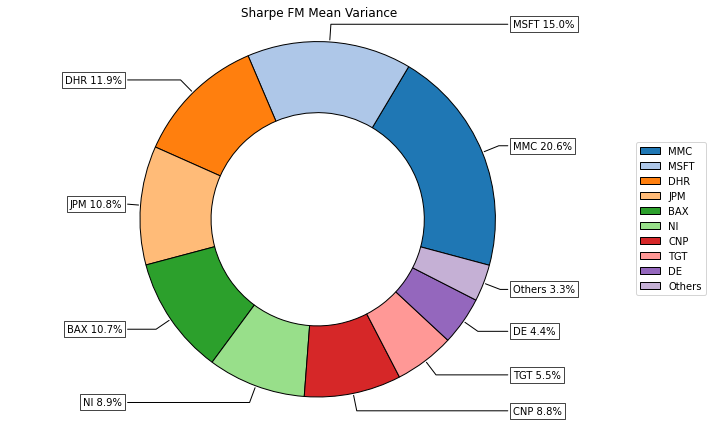

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,2.1989%,4.5591%,3.8256%,9.2597%,5.3360%,0.0000%,0.7115%,0.0000%,4.7328%,...,0.0000%,0.0000%,12.8295%,0.0000%,13.7887%,1.3274%,4.3013%,0.0000%,11.3439%,2.2329%
1,0.0000%,7.1027%,0.0318%,3.1117%,11.3704%,2.6207%,1.1452%,4.7909%,0.0000%,2.1153%,...,1.5933%,0.0000%,14.3550%,0.0000%,5.7264%,0.0000%,5.2858%,0.0000%,11.1550%,2.0767%
2,0.0000%,8.3761%,0.0000%,2.1785%,11.9063%,1.2502%,1.9368%,6.3264%,0.0000%,0.4776%,...,4.4738%,0.0000%,14.6155%,0.0000%,1.6522%,0.0000%,5.5020%,0.0000%,10.6834%,1.5648%
3,0.0000%,9.3599%,0.0000%,0.6616%,11.5836%,0.0000%,2.7426%,7.9789%,0.0000%,0.0000%,...,7.6326%,0.0000%,13.6940%,0.0000%,0.0000%,0.0000%,5.6023%,0.0000%,9.1887%,0.8979%
4,0.0000%,10.0209%,0.0000%,0.0002%,10.3944%,0.0001%,3.5637%,9.7463%,0.0001%,0.0001%,...,10.9879%,0.0000%,11.5630%,0.0001%,0.0000%,0.0000%,5.5869%,0.0000%,6.6448%,0.1031%


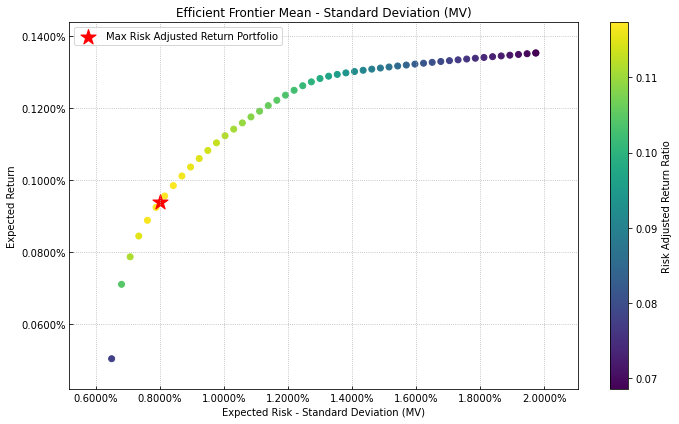

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

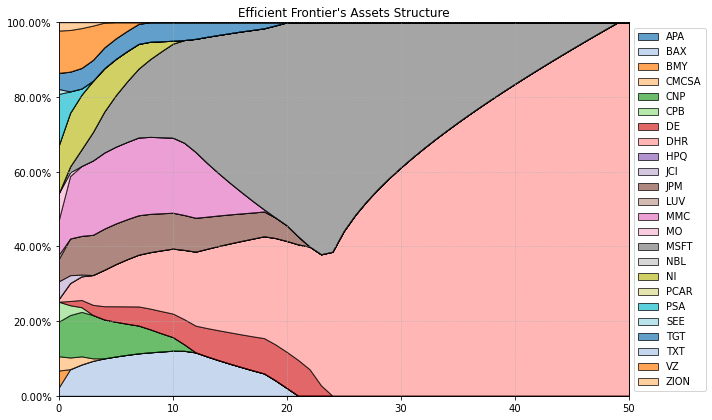

In [8]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Optimization with Constraints on Risk Factors

### 3.1 Statistics of Risk Factors

In [9]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const     -0.0587%
MTUM     -65.6606%
QUAL     -59.9243%
SIZE     -28.9647%
USMV    -120.9438%
VLUE     -49.1496%
dtype: float64

const     0.0688%
MTUM    103.0866%
QUAL    102.9871%
SIZE     93.8007%
USMV    232.5683%
VLUE    172.7834%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,90.4265%,79.1708%,87.2321%,78.5395%
QUAL,90.4265%,100.0000%,89.8149%,89.9554%,91.6580%
SIZE,79.1708%,89.8149%,100.0000%,82.5556%,87.8456%
USMV,87.2321%,89.9554%,82.5556%,100.0000%,76.9678%
VLUE,78.5395%,91.6580%,87.8456%,76.9678%,100.0000%


### 3.2 Creating Constraints on Risk Factors

In [10]:
# Creating risk factors constraints

import riskfolio.ConstraintsFunctions as cf

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [-0.3, 0.8, 0.4, 0.8 , 0.9],}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value
0,False,MTUM,<=,-30.0000%
1,False,QUAL,<=,80.0000%
2,False,SIZE,<=,40.0000%
3,False,USMV,>=,80.0000%
4,False,VLUE,<=,90.0000%


In [11]:
C, D = cf.factors_constraints(constraints, loadings)

In [12]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,18.6889%,0.0000%,3.0701%,5.7737%,0.0000%,0.0000%,...,0.0000%,0.0000%,13.6258%,3.8041%,0.0000%,0.0000%,3.6801%,0.0000%,11.5214%,3.0878%


To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [13]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0235%
MTUM    -30.0000%
QUAL      9.5310%
SIZE     -0.2347%
USMV    100.9194%
VLUE     21.5617%
dtype: float64


### 3.3 Plotting portfolio composition

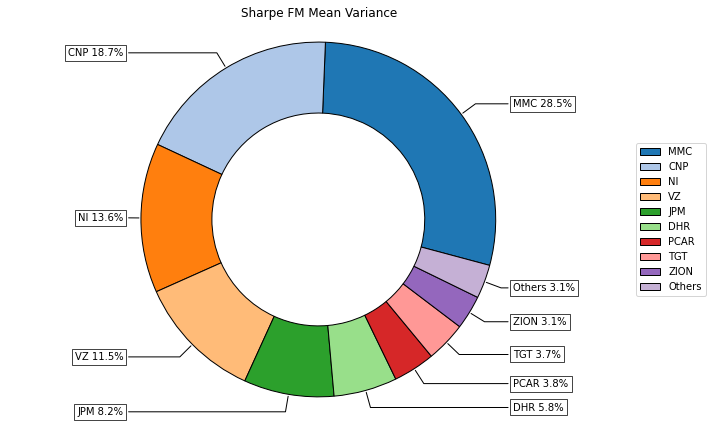

In [14]:
ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 3.4 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.0000%,2.0420%,4.5378%,3.7855%,9.3485%,5.3554%,0.0000%,0.6483%,0.0000%,4.7020%,...,0.0000%,0.0000%,12.8669%,0.0000%,13.7887%,1.3533%,4.2832%,0.0000%,11.4169%,2.2750%
1,0.0000%,2.6488%,1.7229%,2.9240%,12.0369%,4.1406%,0.0000%,2.0666%,0.0000%,2.8782%,...,0.0000%,0.0000%,14.3920%,0.5144%,9.2740%,0.0000%,4.6222%,0.0000%,12.5403%,3.0195%
2,0.0000%,2.7763%,0.9297%,2.6432%,12.6998%,3.7933%,0.1380%,2.4465%,0.0000%,2.3177%,...,0.0000%,0.0000%,14.7812%,0.7807%,8.0331%,0.0000%,4.6850%,0.0000%,12.7799%,3.0909%
3,0.0000%,2.8549%,0.2746%,2.4009%,13.2429%,3.5105%,0.4015%,2.7482%,0.0000%,1.8452%,...,0.0000%,0.0000%,15.1027%,0.9835%,7.0224%,0.0000%,4.7301%,0.0000%,12.9766%,3.1289%
4,0.0000%,2.8626%,0.0000%,2.1265%,13.7812%,3.2291%,0.6322%,3.0206%,0.0000%,1.3512%,...,0.0000%,0.0000%,15.4098%,1.1784%,5.9990%,0.0000%,4.7589%,0.0000%,13.1709%,3.1588%


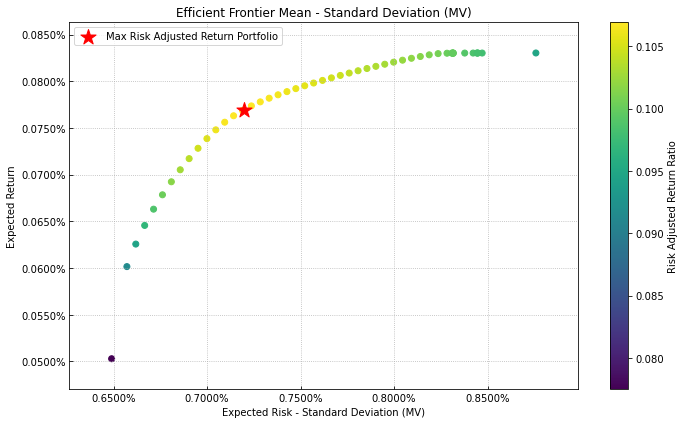

In [16]:
# Plotting efficient frontier composition

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.01, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

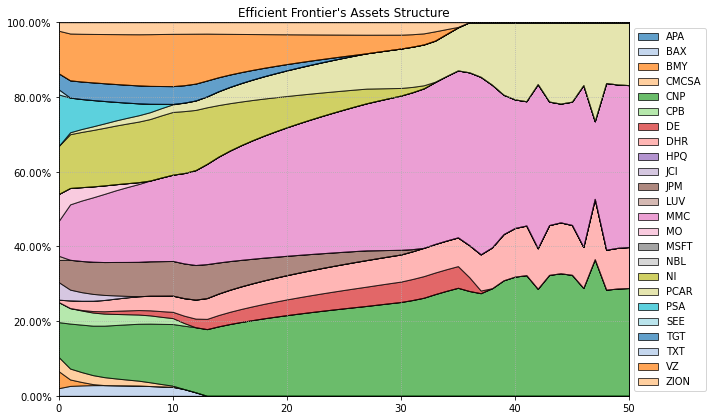

In [17]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [18]:
display(returns)

,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JCI,...,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
2016-01-05,-0.6215%,0.7015%,0.1909%,0.4771%,0.9282%,0.9924%,0.1759%,0.8161%,0.2262%,0.1024%,...,0.5344%,-0.4321%,1.1711%,-0.1142%,0.8782%,0.3504%,0.1709%,-0.2179%,0.9760%,-0.3588%
2016-01-06,-2.8826%,-0.6189%,-0.9938%,-0.8928%,-0.5878%,-0.3664%,-1.6309%,-0.3020%,-2.2656%,-1.2437%,...,-0.9672%,-2.7827%,-0.0189%,-2.1628%,-0.0371%,-1.3295%,-1.3348%,-1.8858%,-0.9189%,-2.5079%
2016-01-07,-2.6622%,-1.9233%,-1.9592%,-1.9764%,-1.2059%,-0.9118%,-2.3293%,-1.8651%,-2.6825%,-1.8346%,...,-2.9276%,-2.9327%,-0.8785%,-2.6700%,-1.0103%,-1.9327%,-1.5868%,-2.5818%,-1.1148%,-2.2576%
2016-01-08,-1.6391%,-1.0494%,-0.9502%,-1.0563%,-1.0629%,-0.9912%,-1.2715%,-0.9816%,-1.3391%,-1.0316%,...,-1.1005%,-1.2200%,-0.9977%,-1.3251%,-0.9137%,-1.2707%,-0.7750%,-1.3178%,-0.9447%,-1.1159%
2016-01-11,-2.1946%,0.3346%,0.0940%,0.1556%,-0.0891%,-0.0991%,-0.6710%,0.6153%,-0.7522%,-0.5531%,...,0.8839%,-0.9994%,0.2116%,-0.7606%,0.3163%,-0.5901%,-0.4203%,-0.8321%,-0.1964%,-1.4507%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.6977%,-0.4231%,-0.0181%,-0.1988%,-0.5601%,-0.7395%,0.1195%,-0.4878%,0.1331%,0.0623%,...,-0.2397%,0.6080%,-0.8528%,0.4848%,-0.6862%,-0.1714%,0.1146%,0.3195%,-0.5775%,0.6393%
2019-12-24,-0.1975%,0.1506%,-0.0503%,0.0391%,0.0930%,0.1012%,0.0555%,0.2258%,-0.0062%,0.0213%,...,0.1480%,-0.2085%,0.1566%,-0.1183%,0.0728%,-0.0241%,0.0305%,-0.0876%,0.0779%,-0.0759%
2019-12-26,0.0838%,0.3568%,0.2717%,0.3344%,0.2787%,0.1975%,0.3098%,0.4043%,0.3698%,0.2075%,...,0.5190%,0.2737%,0.2526%,0.3526%,0.2094%,0.2126%,0.2577%,0.2181%,0.2815%,0.2243%
2019-12-27,-0.7244%,0.2654%,-0.0101%,0.1392%,0.3665%,0.3926%,-0.1307%,0.3868%,-0.2422%,-0.1202%,...,0.1561%,-0.6260%,0.5586%,-0.3002%,0.4284%,-0.0297%,-0.1122%,-0.3575%,0.2902%,-0.5422%


## 4. Estimating Portfolios Using Risk Factors with Other Risk Measures

In this part I will calculate optimal portfolios for several risk measures. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 4.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [19]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [20]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,18.69%,51.76%,60.77%,53.94%,63.58%,55.63%,41.00%,56.58%,49.02%,71.72%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DHR,5.77%,8.68%,9.09%,10.68%,11.57%,16.42%,10.24%,23.08%,4.58%,23.64%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

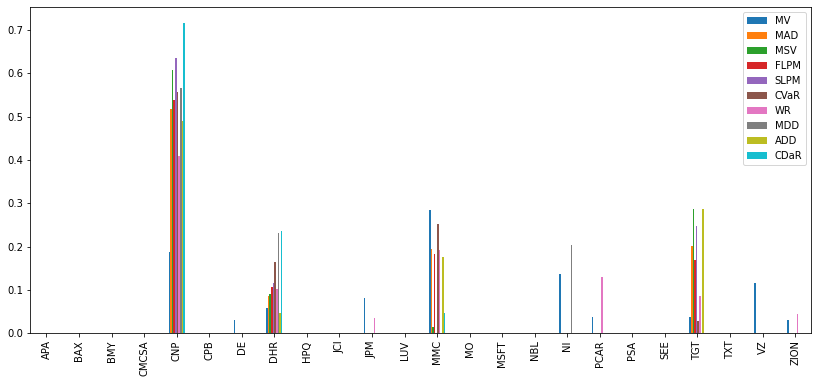

In [21]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [22]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [23]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,WR,MDD,ADD,CDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.84%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,19.75%,14.49%,19.51%,15.03%,21.14%,39.65%,26.52%,54.20%,21.52%,43.04%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,8.59%,0.00%,0.00%,0.00%
DE,3.30%,2.26%,5.21%,2.53%,0.00%,0.00%,0.00%,0.00%,3.40%,0.00%
DHR,5.78%,6.19%,4.68%,5.63%,10.29%,8.96%,3.19%,16.05%,2.40%,14.63%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

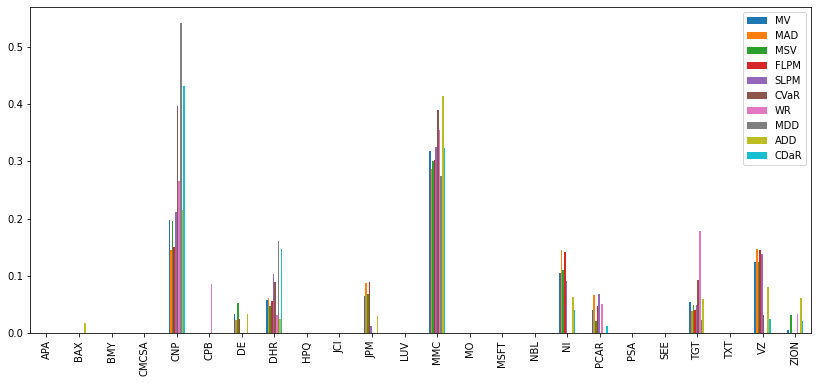

In [24]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)